In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# # Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# # 로컬 아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# # 나눔고딕 설치
# # 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# # 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요. 
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()


# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumGothic') 
# # 마이너스 폰트 깨지는 문제에 대한 대처
# plt.rc("axes", unicode_minus=False)

In [ ]:
import os

# 윈도우, 맥 외의 OS는 별도로 설정해 주세요.
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [5]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.
import os
file = "‪C:\\Users\\EXC\\Downloads\\국민건강보험공단_건강검진정보_20211229.CSV".replace("","")
잘라낼문자열 ='\u202a'

file = file.replace(잘라낼문자열, '')

df = pd.read_csv(file, encoding="cp949")
df.shape

(1000000, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [20]:
# df[""]
print(df["성별코드"].value_counts())
print(df["음주여부"].value_counts())
print(df["흡연상태"].value_counts())

1    510689
2    489311
Name: 성별코드, dtype: int64
1.0    584685
0.0    415119
Name: 음주여부, dtype: int64
1.0    626138
2.0    189808
3.0    183711
Name: 흡연상태, dtype: int64


In [22]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [23]:
# if isinstance(lambda x: x df["흡연유무"] == "1") 
# groupby를 통해 데이터를 그룹화 합니다.
# 성별코드로 그룹화 한 데이터를 세어 봅니다.
df.groupby(["성별코드"])["가입자 일련번호"].count()

성별코드
1    510689
2    489311
Name: 가입자 일련번호, dtype: int64

In [25]:
# 성별코드와 음주여부로 그룹화를 하고 갯수를 세어봅니다.
df.groupby(["성별코드", "음주여부"])["가입자 일련번호"].count()

성별코드  음주여부
1     0.0     131844
      1.0     378767
2     0.0     283275
      1.0     205918
Name: 가입자 일련번호, dtype: int64

In [27]:
df.groupby(["성별코드", "음주여부"])["감마 지티피"].mean()

성별코드  음주여부
1     0.0     34.212195
      1.0     55.059597
2     0.0     24.177603
      1.0     26.728777
Name: 감마 지티피, dtype: float64

In [29]:
df.groupby(["성별코드", "음주여부"])["감마 지티피"].describe()

count       mean        std  min   25%   50%   75%     max
성별코드 음주여부                                                               
1    0.0   130103.0  34.212195  38.533470  1.0  18.0  25.0  37.0  1731.0
     1.0   377769.0  55.059597  69.135224  1.0  24.0  36.0  60.0  2630.0
2    0.0   279033.0  24.177603  26.897676  1.0  14.0  18.0  26.0   999.0
     1.0   205296.0  26.728777  36.415153  1.0  14.0  18.0  27.0   999.0

In [31]:
df.groupby(["성별코드", "음주여부"])["감마 지티피"].agg(
    ["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   130103  34.212195    25.0
     1.0   377769  55.059597    36.0
2    0.0   279033  24.177603    18.0
     1.0   205296  26.728777    18.0

In [35]:
df.pivot_table(index="음주여부", values="가입자 일련번호", aggfunc="count")

,가입자 일련번호
음주여부,
0.0,415119
1.0,584685


In [37]:
pd.pivot_table(df, index="음주여부", values="감마 지티피")

,감마 지티피
음주여부,
0.0,27.368548
1.0,45.084373


In [42]:
pd.pivot_table(df, index="음주여부", values="감마 지티피", 
               aggfunc=["mean", "median"])

,mean,median
,감마 지티피,감마 지티피
음주여부,,
0.0,27.368548,20.0
1.0,45.084373,28.0


In [47]:
pd.pivot_table(df, index=["성별코드", "음주여부", "흡연상태"], values="감마 지티피", 
               aggfunc="count")

감마 지티피
성별코드 음주여부 흡연상태        
1    0.0  1.0    61257
          2.0    40311
          3.0    28507
     1.0  1.0    99001
          2.0   138837
          3.0   139813
2    0.0  1.0   271877
          2.0     2792
          3.0     4306
     1.0  1.0   188190
          2.0     6915
          3.0    10099

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-pack

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-pack

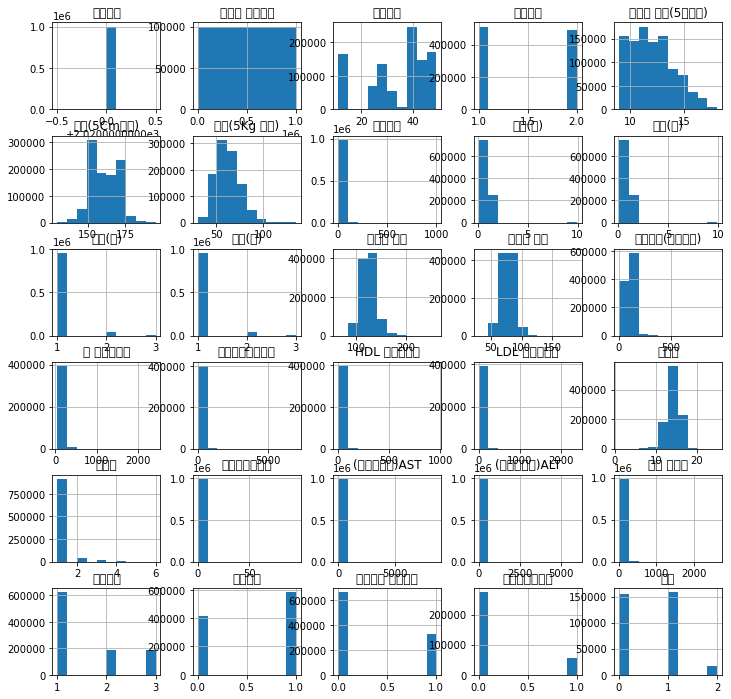

In [48]:
h = df.hist(figsize=(12, 12))

In [51]:
df.iloc[:, :12]   전체로수 12개의컬럼

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우)
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,1.0,1.0
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,1.0,1.0
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,1.0,1.0
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,1.0,1.0


In [50]:
df.iloc[:]컬럼전체 [:12]12번재로까지

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29
5,2020,6,27,1,9,185,85,94.0,1.2,1.2,...,1.1,25.0,32.0,26.0,3.0,1.0,0,NaN,NaN,2021-12-29
6,2020,7,44,1,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,3.0,1.0,1,0.0,1.0,2021-12-29
7,2020,8,41,1,13,160,65,92.0,0.5,0.5,...,1.2,18.0,17.0,19.0,3.0,0.0,1,0.0,2.0,2021-12-29
8,2020,9,41,2,17,150,50,82.0,0.4,0.5,...,0.7,42.0,48.0,39.0,1.0,0.0,0,NaN,NaN,2021-12-29
9,2020,10,48,2,14,150,45,71.2,0.8,0.7,...,0.6,22.0,11.0,10.0,1.0,0.0,0,NaN,NaN,2021-12-29


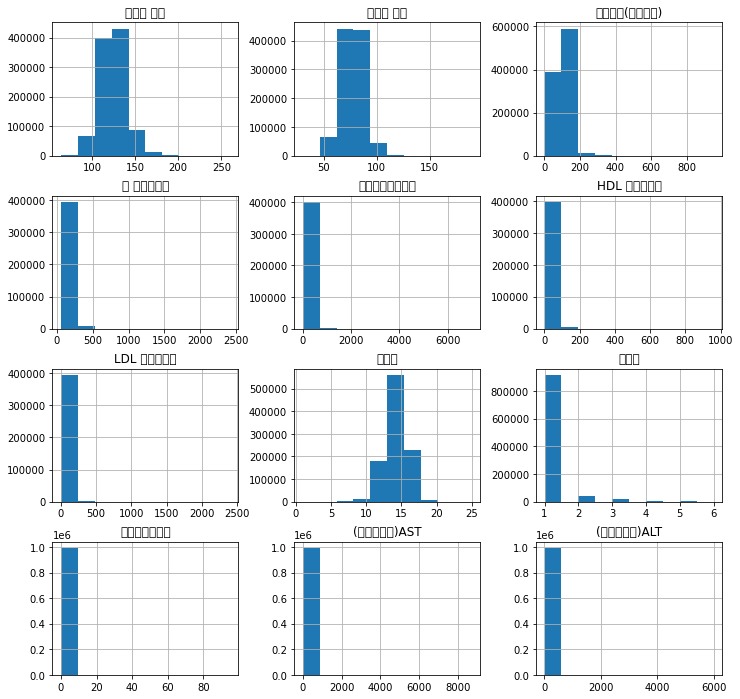

In [53]:
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=10)

In [54]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 31)

<AxesSubplot:>

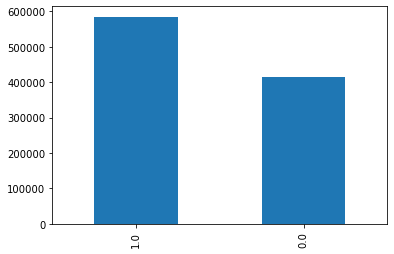

In [55]:
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


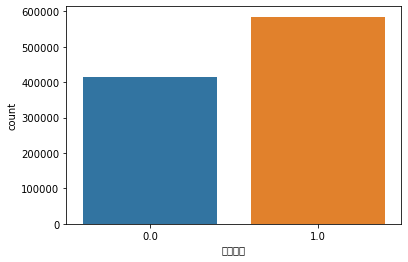

In [56]:
sns.countplot(x="음주여부", data=df)

<AxesSubplot:xlabel='음주여부', ylabel='count'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: U

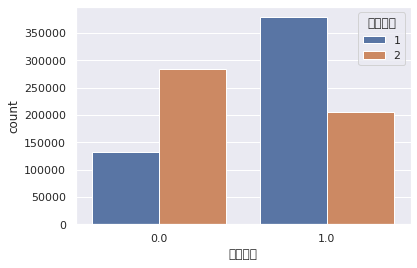

In [57]:
# 음주여부에 따른 countplot을 그리고 hue 를 사용해 성별코드로 색상을 구분해 그립니다.
# 여기에서 hue는 포토샵에 있는 hue 메뉴를 떠올리면 됩니다. 색상을 의미합니다.
# 또, seaborn 에서 제공하는 폰트 설정을 사용하실 수도 있습니다.
# 다만, 이 때 seaborn 의 기본 스타일이 적용되는 것을 확인해 주시는 것이 좋습니다.
# Mac
sns.set(font_scale=1, font="AppleGothic")
# Window
# sns.set(font_scale=1.5, font="Malgun Gothic")
sns.countplot(data=df, x="음주여부", hue="성별코드")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='count'>

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-

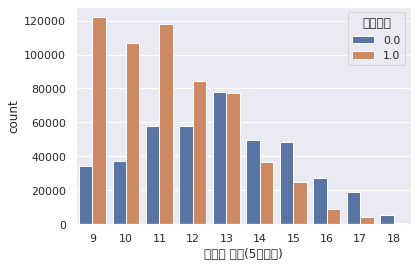

In [62]:
# countplot으로 연령대별 음주여부를 봅니다.
# hue를 사용해 다른 색상으로 표현합니다.
sns.countplot(data=df, x="연령대 코드(5세단위)", hue="음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


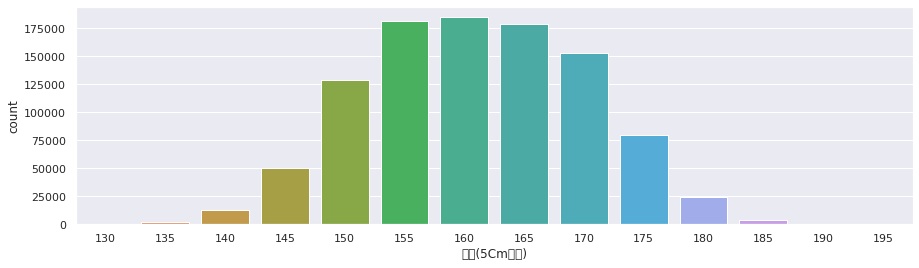

In [63]:
# counplot으로 키를 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


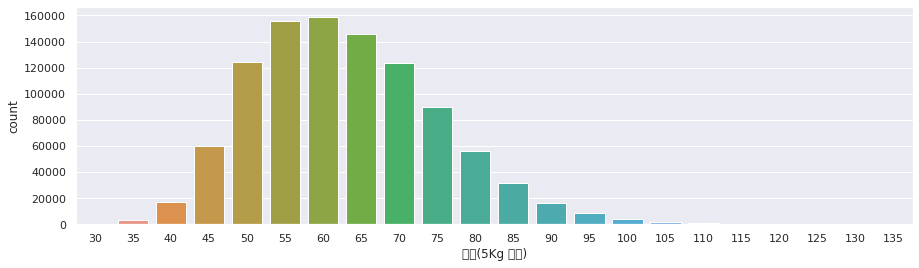

In [64]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg 단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-p

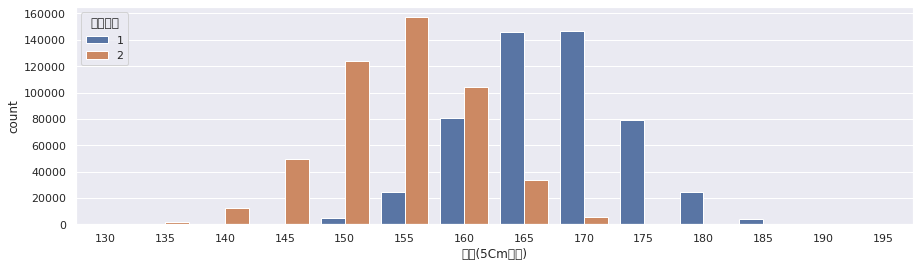

In [65]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-pa

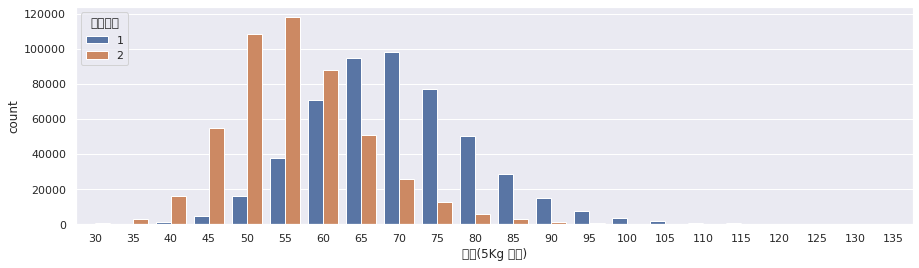

In [67]:
#  성별에 따른 체중의 차이를 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg 단위)", hue="성별코드")

In [71]:
df.columns


Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-

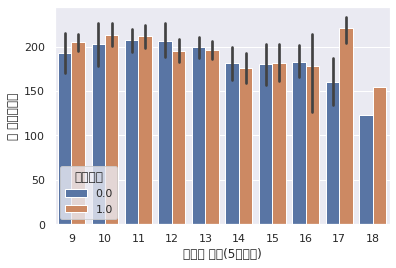

In [72]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue 로 색상을 다르게 표현할 수 있습니다. 음주여부를 함께 봅니다.
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="음주여부")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='트리글리세라이드'>

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-

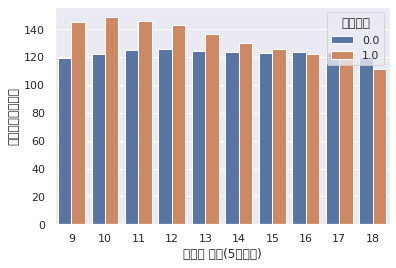

In [75]:
# 트리글리세라이드(중성지방) 에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그립니다.
sns.barplot(data=df, x="연령대 코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci=None)

In [77]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-

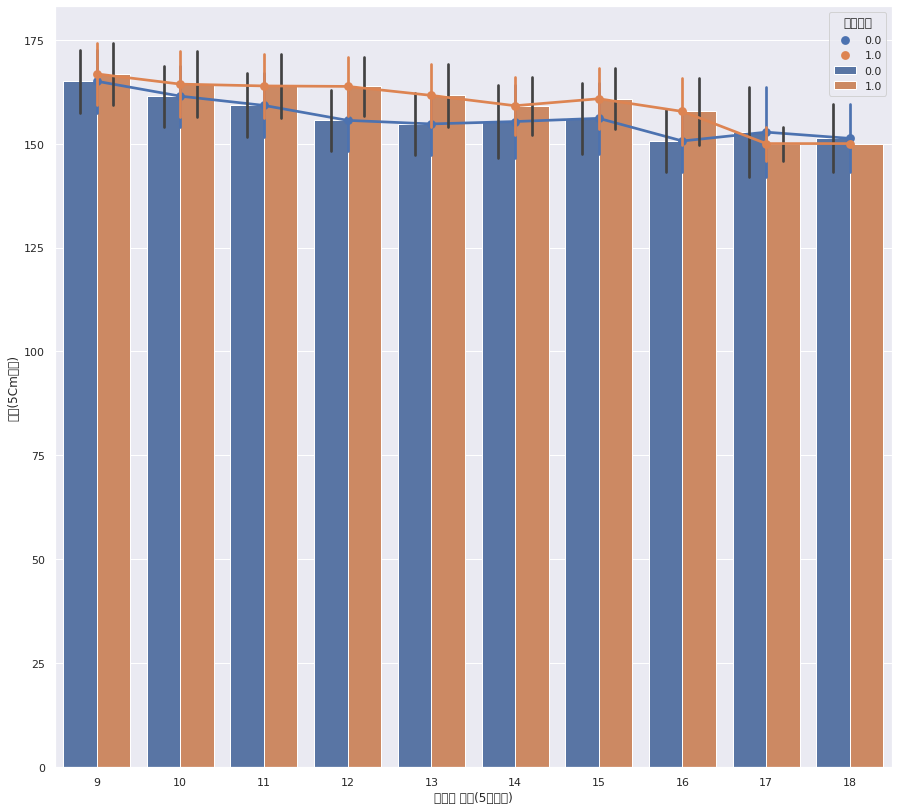

In [80]:
# 연령대코드(5세단위) 에 따른 체중(5Kg 단위) 을 음주여부에 따라 pointplot과 barplot으로 그립니다.


plt.figure(figsize=(15, 14))
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-pack

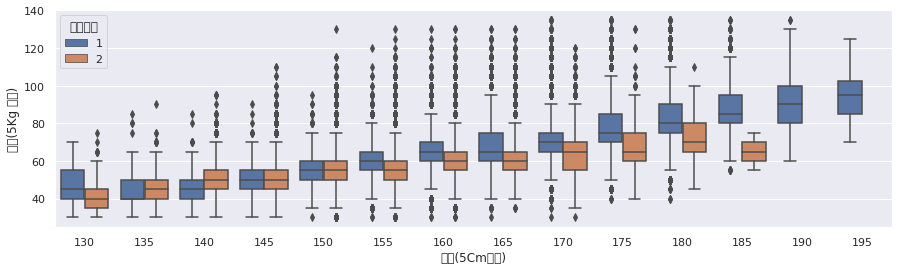

In [81]:
# boxplot으로 신장(5Cm단위) 에 따른 체중(5Kg 단위) 을 그리며, 성별코드에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\EXC\anaconda3\lib\site-pack

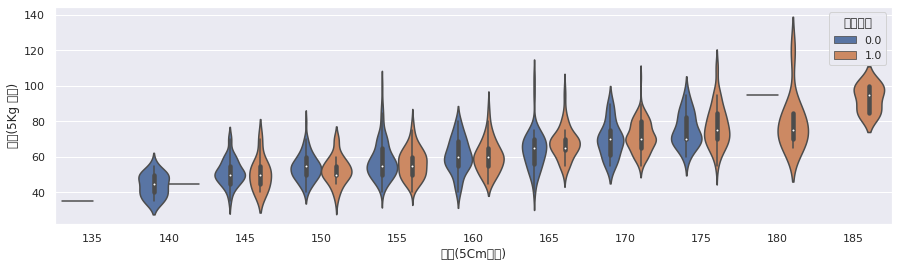

In [82]:
# violinplot 신장(5Cm단위)에 따른 체중(5Kg 단위) 을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

In [83]:
# violinplot 연령대코드(5세단위)에 따른 혈색소를 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.

plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

ValueError: Could not interpret input '연령대코드(5세단위)'

<Figure size 1080x288 with 0 Axes>